In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=pd.read_csv('/content/amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4.0,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the 

In [ ]:
            # DATA CLEANING
# delete duplicated data on basis of user_name
df.drop_duplicates(subset='user_name',keep='first',inplace=True)
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4.0,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the 

In [ ]:
# sorting data on the basis of rating
df = df.sort_values(by='rating',ascending=False)
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,999",80%,5.0,5,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...
775,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,₹499,"₹1,000",50%,5.0,23,Reliable wireless connection up to 10m|Advance...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...
1299,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹4,995","₹20,049",75%,4.8,"3,964",VOLTAGE (230 Volts): Instant Vortex Air Fryer ...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","nikhil,Rituja Ray,Prasan Krishnan Karthikeyan,...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...","Loved it,Good product,Good product,It's easy t...",I have used multiple air fryers. But this one ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Instant-Vortex-2QT-EvenC...
1201,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹279,₹499,44%,4.8,28,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,₹281,"₹1,999",86%,2.8,87,"✅ All-day activity tracking: Track steps, dist...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...
1286,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹499,"₹2,199",77%,2.8,109,Portable & Convenient to Charge: This little b...,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",https://m.media-amazon.com/images/I/51pFS9lDzM...,https://www.amazon.in/MR-BRAND-Portable-Electr...
1356,B0B7L86YCB,Green Ta

In [ ]:
# drop raw if rating is null
df.dropna(subset=['rating'], inplace=True)
df


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,999",80%,5.0,5,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...
775,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,₹499,"₹1,000",50%,5.0,23,Reliable wireless connection up to 10m|Advance...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...
1299,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹4,995","₹20,049",75%,4.8,"3,964",VOLTAGE (230 Volts): Instant Vortex Air Fryer ...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","nikhil,Rituja Ray,Prasan Krishnan Karthikeyan,...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...","Loved it,Good product,Good product,It's easy t...",I have used multiple air fryers. But this one ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Instant-Vortex-2QT-EvenC...
1201,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹279,₹499,44%,4.8,28,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,₹281,"₹1,999",86%,2.8,87,"✅ All-day activity tracking: Track steps, dist...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...
1286,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹499,"₹2,199",77%,2.8,109,Portable & Convenient to Charge: This little b...,"AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...","Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...","RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...","Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",https://m.media-amazon.com/images/I/51pFS9lDzM...,https://www.amazon.in/MR-BRAND-Portable-Electr...
1356,B0B7L86YCB,Green Ta

In [ ]:
# selecting top 100 product on basis of rating
df = df.head(100)
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,999",80%,5.0,5,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...
775,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,₹499,"₹1,000",50%,5.0,23,Reliable wireless connection up to 10m|Advance...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...
1299,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹4,995","₹20,049",75%,4.8,"3,964",VOLTAGE (230 Volts): Instant Vortex Air Fryer ...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","nikhil,Rituja Ray,Prasan Krishnan Karthikeyan,...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...","Loved it,Good product,Good product,It's easy t...",I have used multiple air fryers. But this one ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Instant-Vortex-2QT-EvenC...
1201,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹279,₹499,44%,4.8,28,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,B06XR9PR5X,"Amazon Basics HDMI Coupler,Black",Electronics|HomeAudio|Accessories|Adapters,₹209,₹600,65%,4.4,"18,872",Note: Product only works as an extender adapte...,"AESNQRQGPFRFF3MIKZ6HWY3Z5XPQ,AGPYTMWCOQQUTOWXL...","Bharanidharan,Roshan k jose,fabeel,RS,Jasper,A...","R1PU0LE5YRKY3Y,R2L5EHOA77MWQP,R1GOM8MCTLY767,R...","Good Quality Product,Good Product,Good,Perfect...","Working as expected,Good product, Perfectly wo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/AmazonBasics-AZHDAD01-HD...
1182,B08GJ57MKL,"Coway Professional Air Purifier for Home, Long...","Home&Kitchen|Heating,Cooling&AirQuality|AirPur...","₹14,400","₹59,900",76%,4.4,"3,837",Coway,"AHHUP4DBXB2AQMEO27XIQ3DJSVDQ,AEIUS76RRWIKCMNHH...","Dhatwalia,Tahir Abdulla,Surya Pratap Singh,VIJ...","R33RASBIQKH1EX,RBOPA6420OHEP,R200UL35KLRW7R,RJ...","No visible change,Effective,Sensitivity, Simpl...",Lights inbuilt in this create psychological ef...,https://m.media-amazon.com/images/I/51b5sh94f7...,https://www.amazon.in/Coway-Professional-Purif...
1177,B09SFRNKSR,FABWARE Lint Remover for Clothes - Sticky Lint...,"Home&

In [ ]:
#show product_name with rating
df[['product_name', 'rating','review_content']]

,product_name,rating,review_content
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",5.0,Quick delivery.Awesome ProductPacking was good...
174,Syncwire LTG to USB Cable for Fast Charging Co...,5.0,Product is good in quality. Working good with ...
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0,I really like this wireless mouse it has becam...
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",4.8,I have used multiple air fryers. But this one ...
1201,"Oratech Coffee Frother electric, milk frother ...",4.8,"Overall, I love this Oratech Coffee frother an..."
...,...,...,...
218,"Amazon Basics HDMI Coupler,Black",4.4,"Working as expected,Good product, Perfectly wo..."
1182,"Coway Professional Air Purifier for Home, Long...",4.4,Lights inbuilt in this create psychological ef...
1177,FABWARE Lint Remover for Clothes - Sticky Lint...,4.4,It is quite a nice product to use on your clot...
1190,V-Guard Divino 5 Star Rated 15 Litre Storage W...,4.4,Purchased 10 liter and 3kw model for faster he...


In [ ]:
# Convert 'rating' and 'rating_count' columns to numeric type, handling errors
x = df[['rating', 'rating_count']]
x['rating'] = pd.to_numeric(x['rating'], errors='coerce')
x['rating_count'] = pd.to_numeric(x['rating_count'], errors='coerce')
 # errors='coerce' means if there is some data that cannot be converted to numeric it will convert to null

<ipython-input-29-e9e966d77775>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['rating'] = pd.to_numeric(x['rating'], errors='coerce')
<ipython-input-29-e9e966d77775>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['rating_count'] = pd.to_numeric(x['rating_count'], errors='coerce')


In [ ]:
x.dropna(subset=['rating', 'rating_count'], inplace=True)
x

<ipython-input-30-c6481b5dbf45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(subset=['rating', 'rating_count'], inplace=True)


,rating,rating_count
174,5.0,5.0
775,5.0,23.0
1201,4.8,28.0
1226,4.7,54.0
571,4.6,245.0
1293,4.6,9.0
1289,4.6,124.0
1119,4.6,124.0
1216,4.6,79.0
1146,4.5,546.0


In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [ ]:
print(kmeans.cluster_centers_) # shows mean centroid value

[[  4.5        563.85714286]
 [  4.6        100.31578947]]


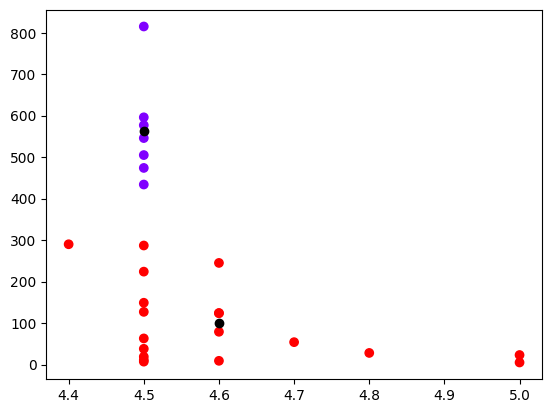

In [ ]:
plt.scatter(x['rating'], x['rating_count'], c=kmeans.labels_, cmap='rainbow') # Access the DataFrame columns using their names
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.show()

In [ ]:
# predict the value
y_pred=kmeans.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

<ipython-input-38-f7e1ea325f5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['rating'])


<Axes: xlabel='rating', ylabel='Density'>

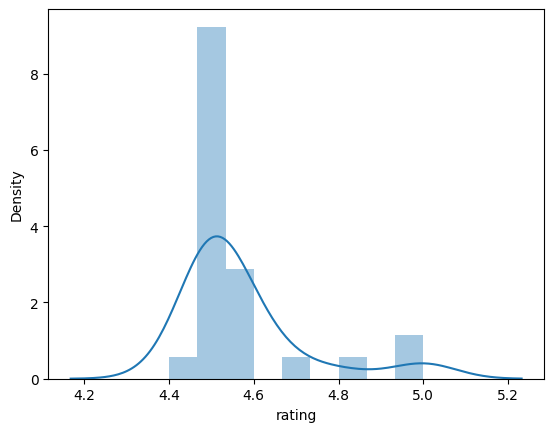

In [ ]:
# apply distplot to product_name and rating
sns.distplot(x['rating'])
